# Homework 3 (Deep Neural Network)
* 截止日期：2020/12/01 18:00前（當天上課前）
* 繳交格式：  
        | --HW3_學號_姓名.zip  
            |-- Hw3_學號_姓名.ipynb
* 繳交檔案時請將debug、紀錄或測試用的檔案刪除(如：.ipynb_checkpoints)
* 請將輸出結果儲存，以便作業檢查
* 若有參考書面或網路資訊，請附上書名或連結，沒付上參考資料者視同剽竊，本作業以0分記
* 請使用`markdown`區塊描述作法或填寫問題

## Homework 3-1 : 實作感知器(區分or邏輯)
  1. 請將所有有含問號`?`的函式補齊，使程式能夠正常運作
      
      > `forward`、`activation` 、`backward`
  2. 請呼叫main函數，並填入epoch與learning rate，並依照下面要求答題 
      > * 請將epoch分別固定在2500，測試至少3種不同的learning rate
      
      > * 請將learning rate分別固定在.01，測試至少3種不同的epoch
  3. 請寫下你覺得調整epoch跟learning rate所造成的影響

In [1]:
import numpy as np
import numpy
import matplotlib.pylab as plt

### Part 1

 請將所有有含問號?的函式補齊，使程式能夠正常運作

In [2]:
#前傳遞=>如同計算 y =ax+b
def forward(Input_X,weight,bias):    
    y_matrix = np.dot(Input_X,weight)+bias #將矩陣相乘  
    Predict_Y = activation(y_matrix) #進入活化函數做大小調整
    return Predict_Y

In [3]:
#活化函數
def activation(s):
    output_value =  1/(1+np.exp(-s))# 請實作sigmmoid function
    return output_value

In [4]:
# 倒傳遞演算法
def backward(Input_X, Output_Y, Predict_Y ,weight,learning_rate,error_history):   
    output_error = Output_Y-Predict_Y #計算誤差
    error_history.append(numpy.mean(numpy.sqrt(numpy.square(output_error)))) #將Mean Square Error 加入error_history
    weight += learning_rate*Input_X.T.dot(output_error) #更新weight，學習率*delta，注意"本次實作沒有隱藏層"
    return weight

In [5]:
#訓練函數
def train(Input_X, Output_Y ,bias, weight,learning_rate,error_history):
    o_matrix = forward(Input_X,weight,bias)
    weight = backward(Input_X, Output_Y, o_matrix,weight,learning_rate,error_history)
    return weight

In [6]:
def predict(xPredicted,weight,bias):
    print ("Predict data\n" + str(xPredicted))
    print ('----------------------')
    print ("Output_rate: \n" + str(forward(xPredicted,weight,bias)))

In [7]:
def result_show(weight,bias,epoch,error_history):
    #此區不用修改，僅為顯示結果用
    #最後的輸出結果為:
    print('最後的weight為:')
    print(weight)
    print('----------------')
    #開始預測不同輸入的結果,此為4組 00 01 10 11
    xPredicted = np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
    predict(xPredicted,weight,bias)#開始預測
    print('----------------')
    print('最後的loss為:')
    print(error_history[-1])

    plt.plot(np.arange(0, epoch, 1), np.array(error_history), label = 'mean square error')
    plt.legend()
    plt.show() 

In [8]:
def main(epoch,learning_rate):
    #主程式開始
    #設定所有資訊
    Input_X = np.array(([0, 0], [0, 1], [1, 0], [1, 1]), dtype=float)#輸入資訊 總共兩維資訊
    Input_size = 2#輸入的維度為多少  此為2
    Output_Y = np.array(([0], [1], [1],[1]), dtype=float)#輸入資訊後應該要有的預期結果
    Output_size = 1#輸出的維度為多少  此為1
    bias=0
    error_history = []#用來記錄每次誤差值
    weight = np.random.randn(Input_size, Output_size)# np.random.randn =>依照常態分配的機率隨機取一個值
    print('最初的weight為:')
    print(weight)#查看一開始亂數產生的weight
    #開始依照每一代做訓練
    for i in range(epoch):
        weight = train(Input_X, Output_Y,bias,weight,learning_rate,error_history)
    #顯示結果
    result_show(weight,bias,epoch,error_history)

### Part 2

請呼叫main函數，填入epoch與learning rate，並依照下面要求答題 
> * 請將epoch固定在2500，測試至少3種不同的learning rate
> * 請將learning rate固定在.01，測試至少3種不同的epoch

測試不同參數時，可將每次的數值差距拉大，以利觀察結果變化

#### 固定epoch

最初的weight為:
[[1.51954993]
 [1.19509118]]
最後的weight為:
[[5.54252033]
 [5.53482449]]
----------------
Predict data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
----------------------
Output_rate: 
[[0.5       ]
 [0.99606862]
 [0.99609864]
 [0.99998454]]
----------------
最後的loss為:
0.12696282186439747


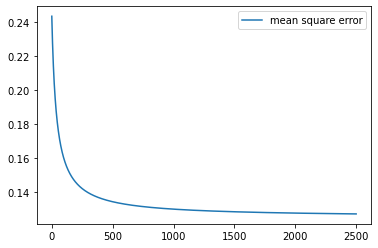

In [9]:
main(2500,0.1)

最初的weight為:
[[ 1.16835696]
 [-0.35148075]]
最後的weight為:
[[3.41096388]
 [3.1989148 ]]
----------------
Predict data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
----------------------
Output_rate: 
[[0.5       ]
 [0.96079342]
 [0.96804543]
 [0.99865482]]
----------------
最後的loss為:
0.14313322904500578


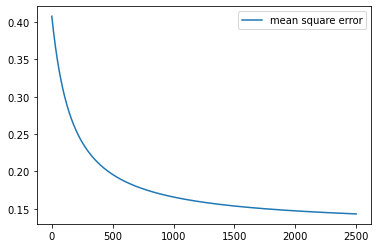

In [10]:
main(2500,0.01)

最初的weight為:
[[-0.52010588]
 [ 1.15163375]]
最後的weight為:
[[0.89999249]
 [1.92896115]]
----------------
Predict data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
----------------------
Output_rate: 
[[0.5       ]
 [0.87313439]
 [0.71094796]
 [0.94422052]]
----------------
最後的loss為:
0.24295401409586317


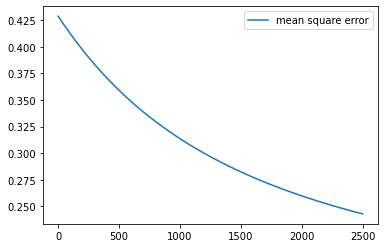

In [11]:
main(2500,0.001)

#### 固定learning rate

最初的weight為:
[[-0.8075934 ]
 [-1.65821925]]
最後的weight為:
[[-0.496991  ]
 [-1.31607805]]
----------------
Predict data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
----------------------
Output_rate: 
[[0.5       ]
 [0.21147154]
 [0.37824806]
 [0.14026761]]
----------------
最後的loss為:
0.6950004482729205


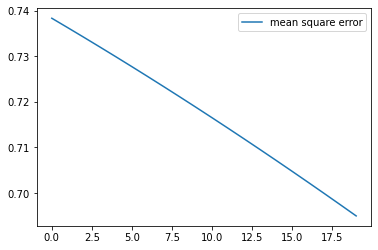

In [12]:
main(20,0.01)

最初的weight為:
[[-0.97811623]
 [-1.34563772]]
最後的weight為:
[[0.90771988]
 [0.67669463]]
----------------
Predict data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
----------------------
Output_rate: 
[[0.5       ]
 [0.66300057]
 [0.71253335]
 [0.82982881]]
----------------
最後的loss為:
0.3245234189798209


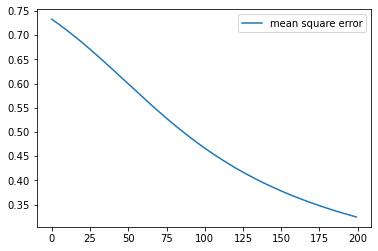

In [13]:
main(200,0.01)

最初的weight為:
[[ 0.06453607]
 [-1.55863622]]
最後的weight為:
[[3.15378945]
 [2.93380383]]
----------------
Predict data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
----------------------
Output_rate: 
[[0.5       ]
 [0.94949241]
 [0.95905778]
 [0.99773428]]
----------------
最後的loss為:
0.14844000387811726


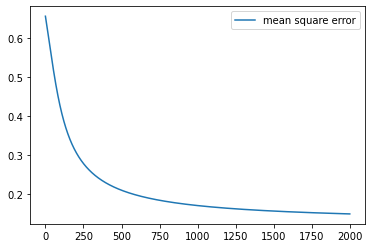

In [14]:
main(2000,0.01)

## Homework 3-2 : DNN with Keras
 作業說明：
 >作業3-2使用[Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) 所提供的資料集，本資料集分為train.csv以及test.csv，請用train.csv建構模型及預測生還者。test.csv中沒有答案，加分題需使用test.csv並上傳至[Kaggle Titanic](https://www.kaggle.com/c/titanic/overview)進行評分。

### Part 0 讀取檔案

請在此區塊後使用**一個或多個區塊**進行讀取檔案，項目**至少**包含：

- 以`pd.read_csv()`讀取檔案
- 以`pd.head()`顯示前5筆資料
- 以`pd.info()`顯示資料型態與大小

請以 `markdown` 簡單描述各變項的意思

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('train.csv') 

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


|變項名稱|含意|
|-|-|
|PassengerId|乘客id編號|
|Survived|是否倖存|
|Pclass|船票等級|
|Name|姓名|
|Sex|性別|
|Age|年齡|
|SibSp|在船上同為兄弟姐妹或配偶的數目|
|Parch|在船上同為家族的父母及小孩的數目|
|Ticket|船票編號|
|Fare|船票價格|
|Cabin|船艙編號|
|Embarked|登船處|

### Part 1 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目**至少**包含：

- 處理缺失值
- 將類別資料進行one-hot encoding
- 繪製數值資料的直方圖查看資料分布
- 整合資料(將處理完的資料重整並分成train_x及train_y)

其他可額外增加的項目：

- 相關係數
- 決定輸入特徵
- 其他資料視覺化
- 其他

請以 `markdown` 簡單描述每個項目的**想法**、**方法**與**原因**：

例如：
1. 觀察...，發現...
2. 填補...，策略...
3. 轉換...，原因...

#### 處理缺失值

In [19]:
#填補缺失值
#觀察資料
print(df['Age'].describe())
print()
print(df['Embarked'].describe())
#填補缺失值

df['Age'].fillna(value=df['Age'].mean(),inplace = True)

df['Embarked'].fillna(value=df['Embarked'].mode()[0],inplace = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


#### 將類別資料進行one-hot encoding

In [20]:
from sklearn.preprocessing import LabelEncoder #Label encoding
from keras.utils import to_categorical #one-hot encoding

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
#資料抓取 -類別資料
Pclass_data = df['Pclass']
Sex_data = df['Sex']
Embarked_data = df['Embarked']

In [22]:
le = LabelEncoder()
Pclass_data = le.fit_transform(Pclass_data)
Sex_data = le.fit_transform(Sex_data)
Embarked_data = le.fit_transform(Embarked_data)

Pclass_data = to_categorical(Pclass_data)
Sex_data = to_categorical(Sex_data)
Embarked_data = to_categorical(Embarked_data)

#### 繪製數值資料的直方圖成看資料分布

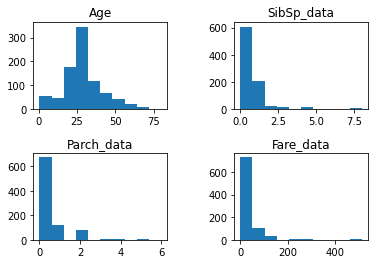

In [23]:

#查看資料分布
plt.subplot(2,2,1) #第一張圖
plt.hist(df['Age'])
plt.title('Age')

plt.subplot(2,2,2) #第二張圖
plt.hist(df['SibSp'])
plt.title('SibSp_data')

plt.subplot(2,2,3) #第三張圖
plt.hist(df['Parch'])
plt.title('Parch_data')

plt.subplot(2,2,4) #第四張圖
plt.hist(df['Fare'])
plt.title('Fare_data')
plt.subplots_adjust(wspace =0.5, hspace =0.5)
plt.show()

#### 整合資料

In [24]:
#整合訓練資料

train_x = pd.DataFrame(
{
    'Age' : df['Age'],
    'Fare': df['Fare'],
    'Pclass_1': Pclass_data.T[0],
    'Pclass_2': Pclass_data.T[1],
    'Pclass_3': Pclass_data.T[2],
    'Parch': df['Parch'],
    'SibSp': df['SibSp'],
    'Sex_female': Sex_data.T[0],
    'Sex_male' : Sex_data.T[1]
})                 # 取出訓練資料需要分析的資料欄位


train_y = df['Survived']                       # 取出訓練資料的答案


### Part2 模型建構、執行與結果呈現

請在此區塊後使用**一個或多個區塊**進行DNN模型訓練，**需要**包含以下內容：

- **DNN模型**
    - 設定模型**超參數**
    - 利用`summary()`顯示模型架構
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**
- 將**訓練過程**利用畫圖套件視覺化
    - 使用**所有**資料進行訓練的**準確度**變化繪製準確度變化圖
    - 使用**所有**資料進行訓練的**Loss**變化繪製損失率變化圖
- 檢驗訓練結果
    - 繪製**混淆矩陣**
    - 繪製**ROC曲線**並計算**auc score**

#### DNN模型

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(1024,input_dim = 9,activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(output_dim = 1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # Remove the CWD from sys.path while we load stuff.


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              10240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 77,953
Trainable params: 77,953
Non-trainable params: 0
_________________________________________________________________


#### 計算準確度（Accuracy）

In [27]:
from sklearn.model_selection import KFold  

In [28]:
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=2020,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度

#5-folder 平均acc
for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤    
    
    model.fit(train_x_split, train_y_split,       #輸入 與 輸出
          nb_epoch = 50,          #子代數
          batch_size = 11,        #批量大小
          verbose = 0 ,           #是否顯示訓練過程
          validation_data=(valid_x_split, valid_y_split)) #拿來預測的資料
    train_acc = model.evaluate(train_x_split,train_y_split)
    train_acc_list.append(train_acc[1])

history = model.fit(train_x, train_y,       #輸入 與 輸出
          nb_epoch = 100,          #子代數
          batch_size = 11,        #批量大小 
          verbose = 0 ) #拿來預測的資料
train_acc_all = model.evaluate(train_x,train_y)
print((
   'average train accuracy: {}\n' +   
    'all data train accuracy: {}'
    ).format(
    np.mean(train_acc_list),# 輸出平均訓練準確度
    train_acc_all[1] ,      # 輸出全部訓練準確度                              
))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


713/713 [==============================] - 0s 41us/step


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 37us/step
average train accuracy: 0.854652750492096
all data train accuracy: 0.875420868396759


#### 將**訓練過程**利用畫圖套件視覺化

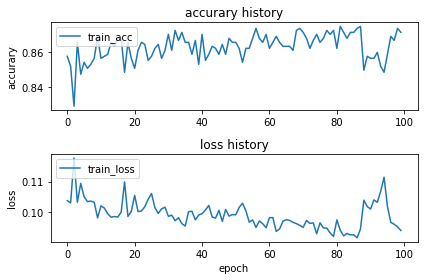

In [29]:
# 訓練過程圖 
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.ylabel("accurary")
plt.title("accurary history")
plt.legend(['train_acc'],loc='upper left')

plt.subplot(212)

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.title("loss history")
plt.legend(['train_loss'],loc='upper left')
plt.xlabel("epoch")

plt.tight_layout()
plt.show()

#### 檢驗訓練結果

In [30]:
predict_y = model.predict_classes(train_x)

In [31]:
confusion = pd.crosstab(train_y,predict_y.reshape(-1),rownames=['true'],colnames=['predict'])
print(confusion)

predict    0    1
true             
0        500   49
1         62  280


In [32]:
#模型預測
y_score = model.predict(train_x)

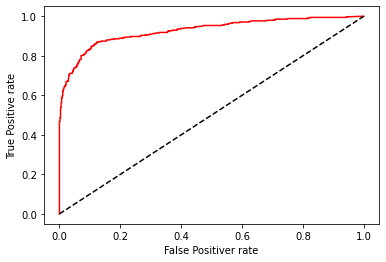

roc auc score:0.9274438372799029


In [33]:
#引入套件
from sklearn.metrics import roc_curve,roc_auc_score
#roc curve
fpr,tpr,thresholds = roc_curve(train_y,y_score)
plt.plot(fpr,tpr,'r-')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positiver rate')
plt.ylabel('True Positive rate')
plt.show()
#auc score
print("roc auc score:"+str(roc_auc_score(train_y,y_score)))